<font color='blue'>

* Name: Jhonatan Nagasako
* Date: 23-FEB-2021
* Purpose: Udacity - Project 3
    * Analyze A/B Test Results

</font>

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

# ==========================
# QUIZ 1

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# checking any missing values --> looks good! No missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

b. Use the below cell to find the number of rows in the dataset.

In [4]:
totalEntries = len(df)
Quiz01_Question01 = totalEntries
Quiz01_Question01

294478

c. The number of unique users in the dataset.

In [5]:
uniqueID = df.user_id.nunique()
uniqueID
#df.groupby('converted').nunique()

#uniqueID = totalEntries - uniqueID - 1
Quiz01_Question02 = uniqueID
Quiz01_Question02

290584

d. The proportion of users converted.

In [6]:
#drop duplicates, then sum converted column
df_clean = df.drop_duplicates(subset=['user_id'])
df_clean.sample(5)

,user_id,timestamp,group,landing_page,converted
76738,878330,2017-01-23 21:58:07.013625,control,old_page,0
220110,855472,2017-01-06 07:33:12.928292,control,old_page,0
41794,848917,2017-01-24 03:38:45.750463,control,old_page,0
117177,676209,2017-01-15 01:39:28.337745,treatment,new_page,0
139207,796399,2017-01-04 17:53:54.767933,treatment,new_page,0


In [7]:
# count sum of new column
convertedCount = df_clean["converted"].sum()
convertedTotal = len(df_clean['converted'])
Quiz01_Question03 = convertedCount/convertedTotal
print('The proportion of users converted is {0:.0%}'.format(Quiz01_Question03))
Quiz01_Question03 = round(Quiz01_Question03,2)

The proportion of users converted is 12%


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
# show just relevent information
df_treatment = df.filter(items=['group', 'landing_page'])
df_treatment.sample(5)
# df_treatment.info() #confirming group and landing page are strings--> yes they are

,group,landing_page
239510,treatment,new_page
213788,control,old_page
273044,control,old_page
211817,treatment,new_page
147477,control,old_page


In [9]:
# checking possiblies for differeing group and landing_page states
pd.crosstab(df.group, df.landing_page, margins=True)

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


In [10]:
# create a new column in df_treatment dataset to determine the counts of new_page to treatment
# 
def label_group (row):
   if row['group'] == 'treatment' and row['landing_page'] == 'new_page':
      return 1
   if row['group'] == 'control' and row['landing_page'] == 'old_page':
      return 1
   return 0

df_treatment.apply (lambda row: label_group(row), axis=1)
df_treatment['treatment_new-page'] = df_treatment.apply (lambda row: label_group(row), axis=1)
df_treatment.sample(5)

,group,landing_page,treatment_new-page
75625,treatment,new_page,1
192227,treatment,new_page,1
91786,control,old_page,1
131069,treatment,new_page,1
266052,treatment,new_page,1


In [11]:
# count sum of new column, subtrack total length of set by the 'TRUE' expected conditions
treatmentNewPageTotal = df_treatment["treatment_new-page"].sum()
Quiz01_Question04 = len(df_treatment['treatment_new-page']) - treatmentNewPageTotal
print('The number of times the new_page and treatment don\'t line up is {} times'.format(Quiz01_Question04))

The number of times the new_page and treatment don't line up is 3893 times


f. Do any of the rows have missing values?

In [12]:
# no, we checked earlier in the program
# checking any missing values --> looks good! No missing values
df.info()
df.isnull().sum()
Quiz01_Question05 = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


<font color='green'>
    
# QUIZ 1 - ANSWER SUMMARY
    
</font>

In [13]:
print('The number of rows in the dataset. --> ', Quiz01_Question01)
print('\nThe number of unique users in the dataset. --> ', Quiz01_Question02)
print('\nThe proportion of users converted. --> ', Quiz01_Question03)
print('\nThe number of times the new_page and treatment don\'t match. --> ', Quiz01_Question04)
print('\nDo any of the rows have missing values? --> ', Quiz01_Question05)

The number of rows in the dataset. -->  294478

The number of unique users in the dataset. -->  290584

The proportion of users converted. -->  0.12

The number of times the new_page and treatment don't match. -->  3893

Do any of the rows have missing values? -->  0


In [14]:
# sanity check from Quiz 1 answers
assert Quiz01_Question01 == 294478
assert Quiz01_Question02 == 290584
assert Quiz01_Question03 == .12
assert Quiz01_Question04 == 3893
assert Quiz01_Question05 == 0

# ==========================
# QUIZ 2

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

<font color=blue>

We want to remove these rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page** because we should only use the rows that we can feel confident in the accuracy of the data.

</font>

In [15]:
df2 = df[((df['group']=='treatment') & (df['landing_page']=='new_page')) | 
         ((df['group']=='control') & (df['landing_page']=='old_page'))]

df2.sample(10)

,user_id,timestamp,group,landing_page,converted
266716,883881,2017-01-13 20:27:05.744392,control,old_page,1
119314,855476,2017-01-22 06:26:06.097034,control,old_page,0
66965,735424,2017-01-14 21:35:34.485557,control,old_page,0
204044,716971,2017-01-20 13:49:06.376417,control,old_page,0
13634,833421,2017-01-22 16:08:23.389329,treatment,new_page,0
6645,942741,2017-01-16 05:18:51.642481,control,old_page,0
113850,706439,2017-01-17 00:41:21.900741,treatment,new_page,0
182597,678165,2017-01-16 05:10:05.852218,control,old_page,0
91843,902727,2017-01-22 05:12:18.208802,treatment,new_page,0
219479,705333,2017-01-07 09:02:36.063561,control,old_page,1


In [16]:
# confirm length from quiz before
print("Before removing = {} rows".format(len(df['group'])))
print("AFTER removing = {} rows".format(len(df2['group'])))

test = len(df['group'])-len(df2['group'])
assert test == 3893, "This number of rows removed is not correct!"


Before removing = 294478 rows
AFTER removing = 290585 rows


In [17]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

# ==========================
# QUIZ 3

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [18]:
Quiz03_Question01 = df2.user_id.nunique()
Quiz03_Question01

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [19]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [20]:
Quiz03_Question02 = df2[df2.duplicated(['user_id'])]
Quiz03_Question02 = Quiz03_Question02.iloc[0]['user_id']
Quiz03_Question02

773192

In [21]:
Quiz03_Question03 = df2[df2.duplicated(['user_id'])].iloc[0]['landing_page']
Quiz03_Question03

'new_page'

In [22]:
Quiz03_Question04 = df2[df2.duplicated(['user_id'])].iloc[0]['group']
Quiz03_Question04 

'treatment'

In [23]:
Quiz03_Question05 = df2[df2.duplicated(['user_id'])].iloc[0]['converted']
Quiz03_Question05

0

c. What is the row information for the repeat **user_id**? 

In [24]:
# from before, question b
rowDuplicate = df2[df2['user_id'] == 773192].index[1]
rowDuplicate

2893

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [25]:
print("Before removing duplicate row from df2 = ", len(df2.user_id))
df2 = df2.drop(df2.index[2893])

print("AFTER removing duplicate row from df2 = ", len(df2.user_id))

Before removing duplicate row from df2 =  290585
AFTER removing duplicate row from df2 =  290584


<font color='green'>
    
# QUIZ 3 - ANSWER SUMMARY
    
</font>

In [26]:
print('The number of unique ids in df2. --> ', Quiz03_Question01)
print('\nThe user_id for the non-unique id in df2. --> ', Quiz03_Question02)
print('\nThe landing_page for the non-unique id. --> ', Quiz03_Question03)
print('\nThe group for the non-unique id. --> ', Quiz03_Question04)
print('\nThe value of converted column for the non-unique id. --> ', Quiz03_Question05)

The number of unique ids in df2. -->  290584

The user_id for the non-unique id in df2. -->  773192

The landing_page for the non-unique id. -->  new_page

The group for the non-unique id. -->  treatment

The value of converted column for the non-unique id. -->  0


In [27]:
# sanity check from Quiz 3 answers
assert Quiz03_Question01 == 290584
assert Quiz03_Question02 == 773192
assert Quiz03_Question03 == 'new_page'
assert Quiz03_Question04 == 'treatment'
assert Quiz03_Question05 == 0

# ==========================
# QUIZ 4

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [28]:
Quiz04_Question01 = '{0:.4}'.format(df2['converted'].mean())
Quiz04_Question01

'0.1196'

b. Given that an individual was in the `control` group, what is the probability they converted?

In [29]:
Quiz04_Question02 = '{0:.4}'.format(df2.query('group == "control"').converted.mean())
Quiz04_Question02

'0.1204'

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [30]:
Quiz04_Question03 = '{0:.4}'.format(df2.query('group == "treatment"').converted.mean())
Quiz04_Question03

'0.1188'

d. What is the probability that an individual received the new page?

In [31]:
Quiz04_Question04 = '{0:.4}'.format(len(df2.query('landing_page == "new_page"'))/len(df2.landing_page))
Quiz04_Question04

'0.5001'

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<font color='blue'>
    
**The evidence calucalted through 4a-4d do NOT provide sufficient evidence that new treatment page leads to more conversion. Based on random allocation of NEW vs OLD landing pages, the control group converted about 12.04% of the time, compared to the treatment group converted 11.88%--about 0.16% difference.**
    
**Further evaluation, specifically a hypothesis testing and a p-value will be required to determine if the new treatment page is BETTER than the current-old control page.**
    
</font>

<font color='green'>
    
# QUIZ 4 - ANSWER SUMMARY
    
</font>

In [32]:
print('Probability of converting regardless of page. --> ', Quiz04_Question01)
print('\nGiven that an individual was in the control group, the probability of converting. --> ', Quiz04_Question02)
print('\nGiven that an individual was in the treatment group, the probability of converting. --> ', Quiz04_Question03)
print('\nThe probability of receiving the new page. --> ', Quiz04_Question04)

Probability of converting regardless of page. -->  0.1196

Given that an individual was in the control group, the probability of converting. -->  0.1204

Given that an individual was in the treatment group, the probability of converting. -->  0.1188

The probability of receiving the new page. -->  0.5001


In [33]:
# sanity check from Quiz 3 answers
assert Quiz04_Question01 == '0.1196'
assert Quiz04_Question02 == '0.1204'
assert Quiz04_Question03 == '0.1188'
assert Quiz04_Question04 == '0.5001'

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<font color='blue'>
    
$$H_0: p_{new} \leq p_{old}$$

$$H_1: p_{new} > p_{old}$$
    
</font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [34]:
pNew = df2.converted.mean()
pNew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [35]:
pOld = df2.converted.mean()
pOld

0.11959708724499628

c. What is $n_{new}$?

In [36]:
df_newPage = df2.query('landing_page == "new_page"')
nNew = len(df_newPage)
nNew

145310

d. What is $n_{old}$?

In [37]:
df_oldPage = df2.query('landing_page == "old_page"')
nOld = len(df_oldPage)
nOld

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [38]:
new_page_converted = np.random.binomial(pNew, 0.5, size=100000)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [39]:
old_page_converted = np.random.binomial(pOld, 0.5, size=100000)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [40]:
pDiff = new_page_converted.mean() - old_page_converted.mean()
pDiff

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [41]:
sample = 10000
p_diffs = []
new_converted_simulation = np.random.binomial(nNew, pNew, sample)/nNew
old_converted_simulation = np.random.binomial(nOld, pOld, sample)/nOld
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

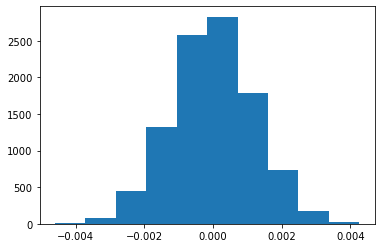

In [42]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
# Calculate the original dataset mean differences observed with old and new
oldMean = df.query('group =="control"').converted.mean()
newMean = df.query('group =="treatment"').converted.mean()
diffs = newMean - oldMean

# Convert to array
p_diffs = np.array(p_diffs)

# Calculate the propotion of the p_diffs are greater than diff from dataset
(p_diffs > diffs).mean()

0.8936

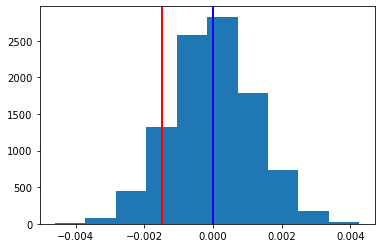

In [44]:
plt.hist(p_diffs);
plt.axvline(diffs, c='r', linewidth = 2);
plt.axvline(pDiff, c='b', linewidth = 2);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font color = 'blue'>

What is this value called in scientific studies? 
* The value is called the p-value, which is the measure of the probability that an observered difference could have occured just by random chance. The smaller the p-value, the stronger the evidence you have to reject the null hypothesis.
    
What does this value mean in terms of whether or not there is a difference between the new and old pages?
* The computation completed indicates that we FAIL to reject the null hypothesis because ```diffs``` (the observed difference between the old and new dataset) is less than ```p_diffs``` (the bootstrapped data). In fact, it is not GREATER than 0.05.
    
</front>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<font color = 'blue'>

What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? 
* z-score of 1.311 represents how many standard deviations above/below the mean.
* The p-value of 0.905 is slitghtly higher than what was calculated earlier--however the hypothesis testing is still the same, we FAIL to reject the null hypothesis.
* Therefore we should continue with the old page.
    
Do they agree with the findings in parts j. and k.?
* Yes, they both agree.
    
</font>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color='blue'>
    
**LOGISTIC REGRESSION**
    
</font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'old_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        16:32:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
old_page       0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [49]:
np.exp(results.params)

intercept    0.134827
old_page     1.015102
dtype: float64

In [50]:
1/_

intercept    7.416937
old_page     0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<font color='blue'>

For logistic regression analysis, the exponetical of the p-value needs to be completed to interpret results. The p-value is higher for the logistic regression. However, it is still greater than 0.05. Therefore, we fail to reject the null hypothesis.
    
</font>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color='blue'>

Adding more factors makes sense depending on the situation that will lead to a more accurate model.
    
To many factors will result with uninterpretable results and inadvertently make the model less accurate.
    
</font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [51]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.sample(5)

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept
user_id,,,,,,,,
689560,UK,2017-01-18 03:27:29.347103,treatment,new_page,0,1,0,1
877078,US,2017-01-16 18:43:50.532280,control,old_page,0,0,1,1
836930,UK,2017-01-11 02:17:53.065207,control,old_page,0,0,1,1
901022,US,2017-01-17 12:55:30.846414,control,old_page,0,0,1,1
653997,US,2017-01-04 11:23:56.867284,treatment,new_page,1,1,0,1


In [52]:
# review new column --> we will drop CA
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
### Create the necessary dummy variables
df_new[['US', 'UK', 'CA']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,US,UK,CA
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept'] = 1
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'old_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        16:32:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
old_page       0.0149      0.011      1.307      0.191      -0.007       0.037
US            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [55]:
np.exp(results.params)

intercept    0.134766
old_page     1.015056
US           0.960062
UK           1.009932
dtype: float64

In [56]:
1/_

intercept    7.420266
old_page     0.985168
US           1.041599
UK           0.990165
dtype: float64

<font color='blue'>
    
After the addition of ```country``` variables, results indicate low statistical significance. 

</font>

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.